<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-Modules" data-toc-modified-id="Importing-Modules-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Importing Modules</a></span></li><li><span><a href="#Importing-Features" data-toc-modified-id="Importing-Features-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Importing Features</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Plotting-Coefficients" data-toc-modified-id="Plotting-Coefficients-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Plotting Coefficients</a></span></li><li><span><a href="#Supoort-Vector-Machine" data-toc-modified-id="Supoort-Vector-Machine-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Supoort Vector Machine</a></span><ul class="toc-item"><li><span><a href="#Plotting-coefficients" data-toc-modified-id="Plotting-coefficients-0.5.1"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>Plotting coefficients</a></span></li></ul></li></ul></li><li><span><a href="#LDA" data-toc-modified-id="LDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LDA</a></span></li><li><span><a href="#LDA-SVD" data-toc-modified-id="LDA-SVD-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LDA-SVD</a></span><ul class="toc-item"><li><span><a href="#Plumed-input" data-toc-modified-id="Plumed-input-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plumed input</a></span></li><li><span><a href="#Sampling-in-MD" data-toc-modified-id="Sampling-in-MD-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sampling in MD</a></span></li><li><span><a href="#Fluctuation-of-Pas-ag-CV-in-Torsion-metad" data-toc-modified-id="Fluctuation-of-Pas-ag-CV-in-Torsion-metad-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fluctuation of Pas-ag CV in Torsion-metad</a></span></li><li><span><a href="#Metadynamics-Classifier-CV" data-toc-modified-id="Metadynamics-Classifier-CV-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Metadynamics Classifier CV</a></span></li><li><span><a href="#BPTI" data-toc-modified-id="BPTI-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>BPTI</a></span></li></ul></li></ul></div>

## Importing Modules

In [1]:
import msmexplorer as msme
import numpy as np
%pylab inline
import seaborn as sns 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import mdtraj as md
from msmbuilder.utils import load,dump

## Importing Features

In [3]:
plot_feat = load("./Plasmepsin/Norm-flipped/raw_features.pkl")
train_feat = load("./Plasmepsin/Norm-flipped/features.pkl")

In [4]:
df = load("./Plasmepsin/Norm-flipped/feature_descriptor.pkl")

In [5]:
df

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[15, 17, 19, 22]",chi1,Dihedral,sin,[75],[GLU],[76]
1,"[30, 32, 34, 37]",chi1,Dihedral,sin,[76],[MET],[77]
2,"[47, 49, 51, 54]",chi1,Dihedral,sin,[77],[ASN],[78]
3,"[61, 63, 65, 68]",chi1,Dihedral,sin,[78],[TYR],[79]
4,"[82, 84, 86, 88]",chi1,Dihedral,sin,[79],[VAL],[80]
5,"[98, 100, 102, 105]",chi1,Dihedral,sin,[80],[SER],[81]
6,"[116, 118, 120, 126]",chi1,Dihedral,sin,[82],[THR],[83]
7,"[130, 132, 134, 136]",chi1,Dihedral,sin,[83],[VAL],[84]
8,"[146, 148, 150, 153]",chi1,Dihedral,sin,[84],[SER],[85]
9,"[15, 17, 19, 22]",chi1,Dihedral,cos,[75],[GLU],[76]


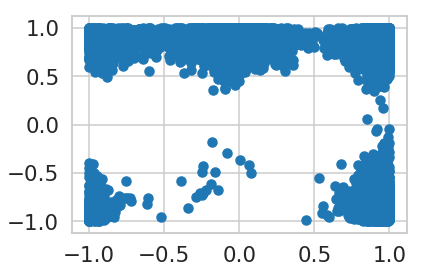

In [13]:
scatter(np.vstack(plot_feat)[:,0],np.vstack(plot_feat)[:,1])

## Training

In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [15]:
X=np.vstack(plot_feat)
train_X=np.vstack(train_feat)

train_Y=np.concatenate([np.zeros(len(plot_feat[0])),
            np.ones(len(plot_feat[0]))])
if not os.path.isfile("./Plasmepsin/Norm-flipped/pasag_model_plm.pkl"):
    train =True 
else:
    clf = load("./Plasmepsin/Norm-flipped/pasag_model_plm.pkl")
    train =False
if train:
    clf = PassiveAggressiveClassifier(max_iter=1000)
    clf.fit(train_X, train_Y)

In [16]:
if train:
    from msmbuilder.utils import dump
    dump(clf,"./Plasmepsin/Norm-flipped/pasag_model_plm.pkl")

In [17]:
clf = load("./Plasmepsin/Norm-flipped/pasag_model_plm.pkl")

## Plotting Coefficients

Text(0, 0.5, 'Pasag-Coeff')

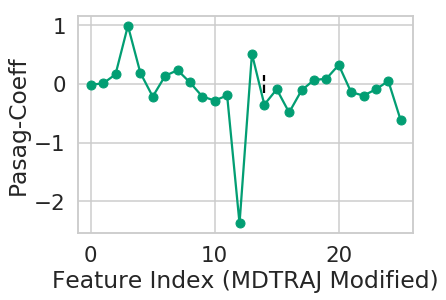

In [18]:
clr_plt = sns.color_palette("colorblind")
plot(clf.coef_.T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'Pasag-Coeff')

In [22]:
nx =ny=50
lim_x = lim_y = np.linspace(-1,1,nx)

In [24]:
coeff = ",".join([str(i) for i in clf.coef_[0]])

In [25]:
coeff

'-0.00892743191454,0.0119532914954,0.166988105327,0.995260526778,0.194121671804,-0.212704249528,0.140582501255,0.23856497775,0.0294256789917,-0.211381037262,-0.280070714036,-0.192261549775,-2.37412115062,0.517478577217,-0.349387420261,-0.0875887150092,-0.482944729823,-0.10687880102,0.070750861277,0.0919029052048,0.327100921256,-0.137382218636,-0.195385640038,-0.0881852490006,0.0529818026543,-0.617364932454'

In [26]:
w_norm = np.linalg.norm(clf.coef_)
func="(x+%s)/%s"%(str(clf.intercept_[0]),str(w_norm))
func

'(x+0.179495493537)/2.86130439592'

## Supoort Vector Machine

In [7]:
from sklearn.svm import LinearSVC

In [8]:
X=np.vstack(plot_feat)
train_X=np.vstack(train_feat)

train_Y=np.concatenate([np.zeros(len(plot_feat[0])),
            np.ones(len(plot_feat[0]))])
if not os.path.isfile("./Plasmepsin/Norm-flipped/svmlinear_model_plm.pkl"):
    train =True 
else:
    clf = load("./Plasmepsin/Norm-flipped/svmlinear_model_plm.pkl")
    train =False
if train:
    clf = LinearSVC(penalty="l1",C=1,dual=False)
    clf.fit(train_X, train_Y)

In [9]:
if train:
    from msmbuilder.utils import dump
    dump(clf,"./Plasmepsin/Norm-flipped/svmlinear_model_plm.pkl")

In [10]:
clf = load("./Plasmepsin/Norm-flipped/svmlinear_model_plm.pkl")

### Plotting coefficients

Text(0, 0.5, 'SVM-Coeff')

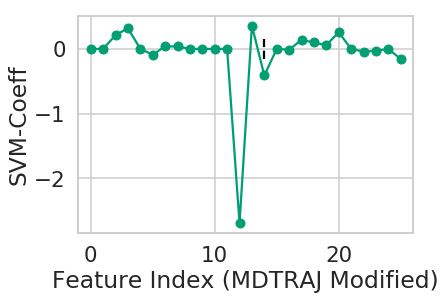

In [11]:
clr_plt = sns.color_palette("colorblind")
plot(clf.coef_.T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'SVM-Coeff')

# LDA

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
X=np.vstack(plot_feat)
train_X=np.vstack(train_feat)

train_Y=np.concatenate([np.zeros(len(plot_feat[0])),
            np.ones(len(plot_feat[0]))])
if not os.path.isfile("./Plasmepsin/Norm-flipped/lda_model_plm.pkl"):
    train =True 
else:
    clf = load("./Plasmepsin/Norm-flipped/lda_model_plm.pkl")
    train =False
if train:
    clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', n_components=2, tol=0.0001)
    clf.fit(train_X, train_Y)

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [14]:
if train:
    from msmbuilder.utils import dump
    dump(clf,"./Plasmepsin/Norm-flipped/lda_model_plm.pkl")

In [15]:
clf = load("./Plasmepsin/Norm-flipped/lda_model_plm.pkl")

Text(0, 0.5, 'LD1')

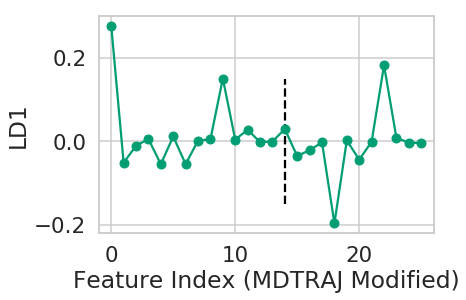

In [16]:
clr_plt = sns.color_palette("colorblind")
plot(clf.covariance_[:,0].T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'LD1')

Text(0, 0.5, 'LD2')

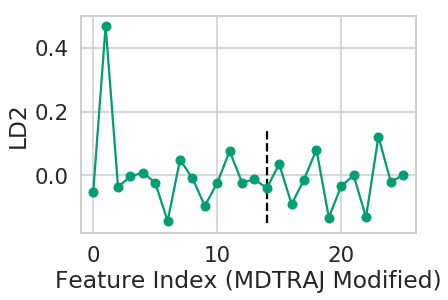

In [17]:
clr_plt = sns.color_palette("colorblind")
plot(clf.covariance_[:,1].T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'LD2')

Text(0, 0.5, 'LD3')

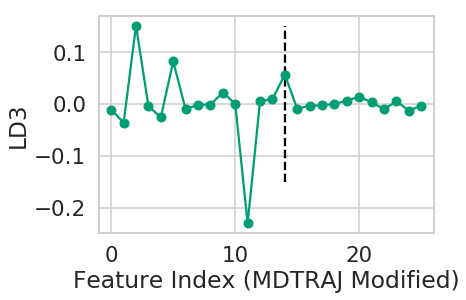

In [19]:
clr_plt = sns.color_palette("colorblind")
plot(clf.covariance_[:,2].T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'LD3')

Text(0, 0.5, 'LD4')

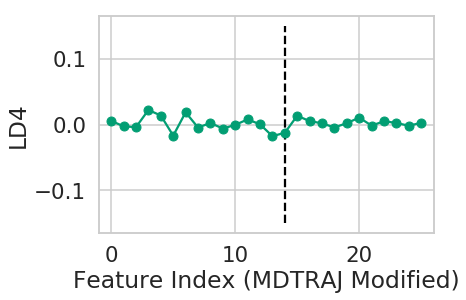

In [20]:
clr_plt = sns.color_palette("colorblind")
plot(clf.covariance_[:,3].T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'LD4')

Text(0, 0.5, 'LD5')

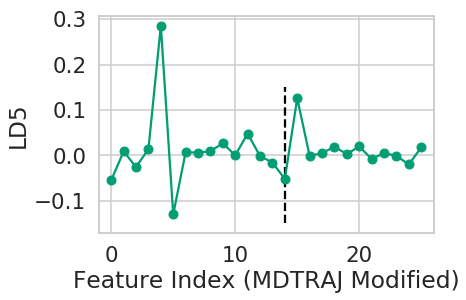

In [21]:
clr_plt = sns.color_palette("colorblind")
plot(clf.covariance_[:,4].T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'LD5')

# LDA-SVD

In [23]:
X=np.vstack(plot_feat)
train_X=np.vstack(train_feat)

train_Y=np.concatenate([np.zeros(len(plot_feat[0])),
            np.ones(len(plot_feat[0]))])
if not os.path.isfile("./Plasmepsin/Norm-flipped/lda-svd_model_plm.pkl"):
    train =True 
else:
    clf = load("./Plasmepsin/Norm-flipped/lda-svd_model_plm.pkl")
    train =False
if train:
    clf = LinearDiscriminantAnalysis(solver='svd', tol=0.0001)
    clf.fit(train_X, train_Y)

In [24]:
if train:
    from msmbuilder.utils import dump
    dump(clf,"./Plasmepsin/Norm-flipped/lda-svd_model_plm.pkl")

In [25]:
clf = load("./Plasmepsin/Norm-flipped/lda-svd_model_plm.pkl")

Text(0, 0.5, 'LDA-SVD')

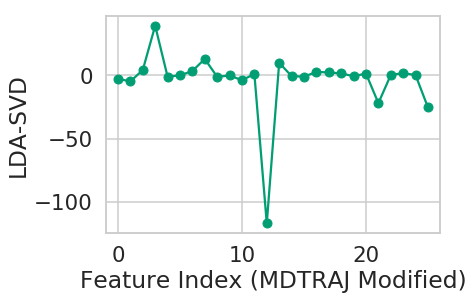

In [27]:
clr_plt = sns.color_palette("colorblind")
plot(clf.coef_.T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'LDA-SVD')

## Plumed input

In [ ]:
RESTART
WHOLEMOLECULES ENTITY0=1-5178

# Dihedral angles
TORSION ATOMS=1135,1137,1139,1142 LABEL=chi1_75 
TORSION ATOMS=1150,1152,1154,1157 LABEL=chi1_76 
TORSION ATOMS=1167,1169,1171,1174 LABEL=chi1_77 
TORSION ATOMS=1181,1183,1185,1188 LABEL=chi1_78 
TORSION ATOMS=1202,1204,1206,1208 LABEL=chi1_79 
TORSION ATOMS=1218,1220,1222,1225 LABEL=chi1_80 
TORSION ATOMS=1236,1238,1240,1246 LABEL=chi1_82 
TORSION ATOMS=1250,1252,1254,1256 LABEL=chi1_83 
TORSION ATOMS=1266,1268,1270,1273 LABEL=chi1_84 

TORSION ATOMS=1137,1139,1142,1145 LABEL=chi2_75 
TORSION ATOMS=1152,1154,1157,1160 LABEL=chi2_76 
TORSION ATOMS=1169,1171,1174,1175 LABEL=chi2_77 
TORSION ATOMS=1183,1185,1188,1189 LABEL=chi2_78

# Just making a sin and cos modification to remove periodicity and removing the mean
MATHEVAL ARG=chi1_75 FUNC=sin(x)-0.285925684714 LABEL=meanfree_sin_chi1_75 PERIODIC=NO 
MATHEVAL ARG=chi1_76 FUNC=sin(x)--0.103314016588 LABEL=meanfree_sin_chi1_76 PERIODIC=NO 
MATHEVAL ARG=chi1_77 FUNC=sin(x)--0.425730960255 LABEL=meanfree_sin_chi1_77 PERIODIC=NO 
MATHEVAL ARG=chi1_78 FUNC=sin(x)--0.708577320665 LABEL=meanfree_sin_chi1_78 PERIODIC=NO 
MATHEVAL ARG=chi1_79 FUNC=sin(x)--0.0373688560274 LABEL=meanfree_sin_chi1_79 PERIODIC=NO 
MATHEVAL ARG=chi1_80 FUNC=sin(x)-0.0556836141971 LABEL=meanfree_sin_chi1_80 PERIODIC=NO 
MATHEVAL ARG=chi1_82 FUNC=sin(x)--0.343280335685 LABEL=meanfree_sin_chi1_82 PERIODIC=NO 
MATHEVAL ARG=chi1_83 FUNC=sin(x)--0.0598552978602 LABEL=meanfree_sin_chi1_83 PERIODIC=NO 
MATHEVAL ARG=chi1_84 FUNC=sin(x)--0.07389594748 LABEL=meanfree_sin_chi1_84 PERIODIC=NO 
MATHEVAL ARG=chi1_75 FUNC=cos(x)-0.0324684692896 LABEL=meanfree_cos_chi1_75 PERIODIC=NO 
MATHEVAL ARG=chi1_76 FUNC=cos(x)-0.412951201999 LABEL=meanfree_cos_chi1_76 PERIODIC=NO 
MATHEVAL ARG=chi1_77 FUNC=cos(x)--0.39177719407 LABEL=meanfree_cos_chi1_77 PERIODIC=NO 
MATHEVAL ARG=chi1_78 FUNC=cos(x)-0.122655590501 LABEL=meanfree_cos_chi1_78 PERIODIC=NO 
MATHEVAL ARG=chi1_79 FUNC=cos(x)--0.123297529289 LABEL=meanfree_cos_chi1_79 PERIODIC=NO 
MATHEVAL ARG=chi1_80 FUNC=cos(x)-0.339399645747 LABEL=meanfree_cos_chi1_80 PERIODIC=NO 
MATHEVAL ARG=chi1_82 FUNC=cos(x)-0.219651231521 LABEL=meanfree_cos_chi1_82 PERIODIC=NO 
MATHEVAL ARG=chi1_83 FUNC=cos(x)--0.540599600776 LABEL=meanfree_cos_chi1_83 PERIODIC=NO 
MATHEVAL ARG=chi1_84 FUNC=cos(x)--0.64103839227 LABEL=meanfree_cos_chi1_84 PERIODIC=NO 
MATHEVAL ARG=chi2_75 FUNC=sin(x)--0.266255092355 LABEL=meanfree_sin_chi2_75 PERIODIC=NO 
MATHEVAL ARG=chi2_76 FUNC=sin(x)-0.0869146439328 LABEL=meanfree_sin_chi2_76 PERIODIC=NO 
MATHEVAL ARG=chi2_77 FUNC=sin(x)--0.0875130079692 LABEL=meanfree_sin_chi2_77 PERIODIC=NO 
MATHEVAL ARG=chi2_78 FUNC=sin(x)--0.115268530656 LABEL=meanfree_sin_chi2_78 PERIODIC=NO 
MATHEVAL ARG=chi2_75 FUNC=cos(x)--0.383119537168 LABEL=meanfree_cos_chi2_75 PERIODIC=NO 
MATHEVAL ARG=chi2_76 FUNC=cos(x)--0.561199420264 LABEL=meanfree_cos_chi2_76 PERIODIC=NO 
MATHEVAL ARG=chi2_77 FUNC=cos(x)-0.305502917941 LABEL=meanfree_cos_chi2_77 PERIODIC=NO 
MATHEVAL ARG=chi2_78 FUNC=cos(x)--0.0154215339936 LABEL=meanfree_cos_chi2_78 PERIODIC=NO

#Linear combination with coefficients from classifiers
COMBINE LABEL=pasag ARG=meanfree_sin_chi1_75,meanfree_sin_chi1_76,meanfree_sin_chi1_77,meanfree_sin_chi1_78,meanfree_sin_chi1_79,meanfree_sin_chi1_80,meanfree_sin_chi1_82,meanfree_sin_chi1_83,meanfree_sin_chi1_84,meanfree_cos_chi1_75,meanfree_cos_chi1_76,meanfree_cos_chi1_77,meanfree_cos_chi1_78,meanfree_cos_chi1_79,meanfree_cos_chi1_80,meanfree_cos_chi1_82,meanfree_cos_chi1_83,meanfree_cos_chi1_84,meanfree_sin_chi2_75,meanfree_sin_chi2_76,meanfree_sin_chi2_77,meanfree_sin_chi2_78,meanfree_cos_chi2_75,meanfree_cos_chi2_76,meanfree_cos_chi2_77,meanfree_cos_chi2_78 COEFFICIENTS=-0.00892743191454,0.0119532914954,0.166988105327,0.995260526778,0.194121671804,-0.212704249528,0.140582501255,0.23856497775,0.0294256789917,-0.211381037262,-0.280070714036,-0.192261549775,-2.37412115062,0.517478577217,-0.349387420261,-0.0875887150092,-0.482944729823,-0.10687880102,0.070750861277,0.0919029052048,0.327100921256,-0.137382218636,-0.195385640038,-0.0881852490006,0.0529818026543,-0.617364932454 PERIODIC=NO

#Normalisation of pasag
MATHEVAL ARG=pasag FUNC=(x+0.179495493537)/2.86130439592 LABEL=pcv PERIODIC=NO 

#Tyr and Trp H-bond
d1: DISTANCE ATOMS=630,1194
#Tyr and Asp H-bond
d2: DISTANCE ATOMS=542,1194
#DIST2
d3: DISTANCE ATOMS=535,1204
#DIST3
d4: DISTANCE ATOMS=3337,4559

# Perform metadynamics
METAD ...
 LABEL=metad
 ARG=pcv SIGMA=0.25 HEIGHT=1.20 FILE=HILLS BIASFACTOR=20 TEMP=300.0 PACE=500
 GRID_MIN=-10.0 GRID_MAX=10.0 GRID_BIN=180 GRID_WSTRIDE=5000 GRID_WFILE=BIAS.dat
 CALC_RCT
... METAD

# Output
PRINT ARG=pcv,chi1_78,chi2_78,d1,d2,d3,d4,metad.* STRIDE=500 FILE=COLVAR_flap_pasag

## Sampling in MD

**4 independent MD simulations. Just showing one example. We can see that the MD simulation didn't sample the flipped state (+/- 3 radian)**

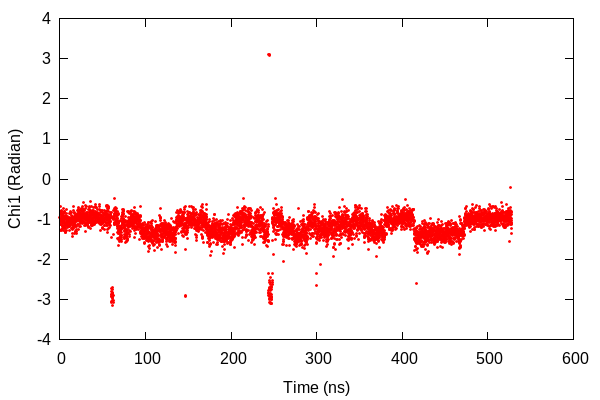


set xlabel 'Time (ns)'
set ylabel 'Chi1 (Radian)'

set output '/tmp/gnuplot-inline-1591704103.4388158.981898776799.png'
p '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver2/Chi_angles/COLVAR_extra' every 100 u ($1/1000):10 w p ps 0.3 pt 7 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [4]:
%gnuplot inline pngcairo font "Arial,12" size 600,400

set xlabel 'Time (ns)'
set ylabel 'Chi1 (Radian)'

p '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver2/Chi_angles/COLVAR_extra' every 100 u ($1/1000):10 w p ps 0.3 pt 7 lc 1 notitle

** 2D plot along Chi1 and Chi2 angles from MD simulation **

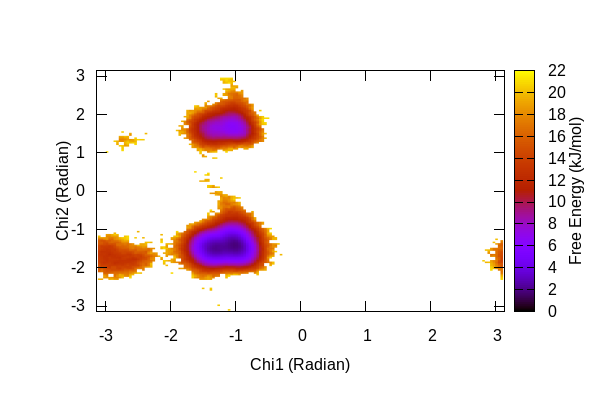

reset
set xlabel 'Chi1 (Radian)'
set ylabel 'Chi2 (Radian)'
set xrange [-3.14:3.14]
set yrange [-3.14:3.14]

set cblabel 'Free Energy (kJ/mol)'

set pm3d map

set output '/tmp/gnuplot-inline-1591705143.612507.222593439192.png'
sp '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver2/Chi_angles/fes_chi.dat' u 1:2:($3-12) notitle




gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [15]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1 (Radian)'
set ylabel 'Chi2 (Radian)'
set xrange [-3.14:3.14]
set yrange [-3.14:3.14]

set cblabel 'Free Energy (kJ/mol)'

set pm3d map

sp '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver2/Chi_angles/fes_chi.dat' u 1:2:($3-12) notitle

**Fluctuation of Pas-ag CV in MD**

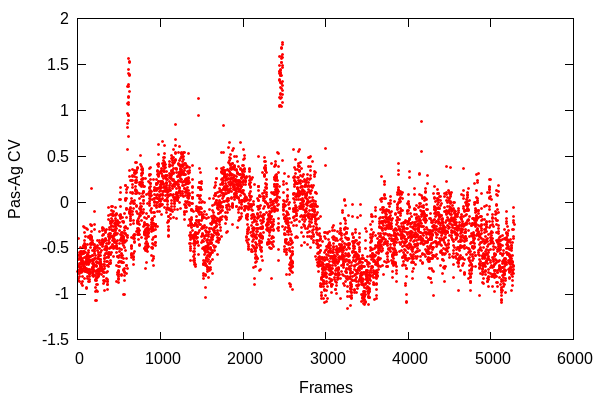

reset
set xlabel 'Frames'
set ylabel 'Pas-Ag CV'

set output '/tmp/gnuplot-inline-1592049343.7019033.198618213765.png'
p '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver-pas-ag-CV/COLVAR' u 1:2 w p ps 0.3 pt 7 lc 1 notitle






gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [42]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Frames'
set ylabel 'Pas-Ag CV'

p '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver-pas-ag-CV/COLVAR' u 1:2 w p ps 0.3 pt 7 lc 1 notitle

## Fluctuation of Pas-ag CV in Torsion-metad

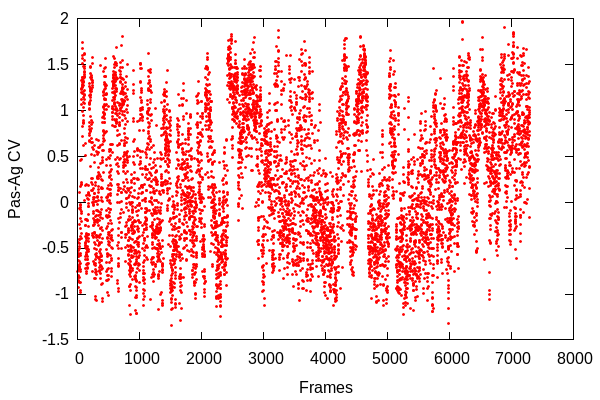

reset
set xlabel 'Frames'
set ylabel 'Pas-Ag CV'

set output '/tmp/gnuplot-inline-1592049354.9021502.438263504989.png'
p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Torsion_Tyr/Driver-pas-agCV/COLVAR' u 1:2 w p ps 0.3 pt 7 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [43]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Frames'
set ylabel 'Pas-Ag CV'

p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Torsion_Tyr/Driver-pas-agCV/COLVAR' u 1:2 w p ps 0.3 pt 7 lc 1 notitle

## Metadynamics Classifier CV

** Fluctuation of Chi1 angle during metadynamics-still running**

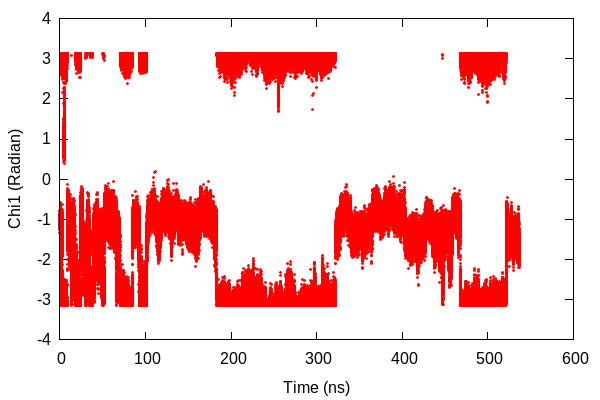

reset
set xlabel 'Time (ns)'
set ylabel 'Chi1 (Radian)'

set output '/tmp/gnuplot-inline-1593425118.6739216.941071836862.png'


gnuplot> gnuplot> p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/COLVAR' u ($1/1000):3 w p ps 0.3 pt 7 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [32]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Chi1 (Radian)'

p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/COLVAR' u ($1/1000):3 w p ps 0.3 pt 7 lc 1 notitle

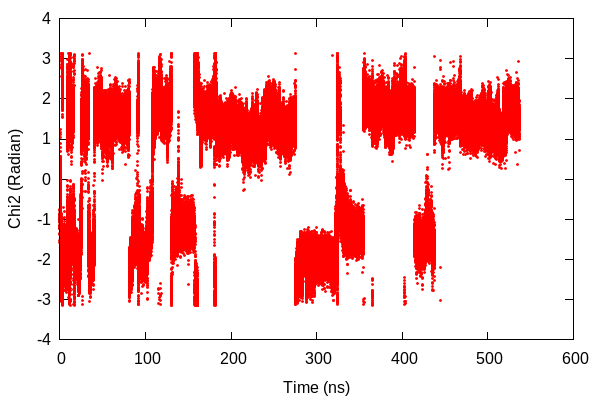

reset
set xlabel 'Time (ns)'
set ylabel 'Chi2 (Radian)'

set output '/tmp/gnuplot-inline-1593425136.00855.742417431032.png'
p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/COLVAR' u ($1/1000):4 w p ps 0.3 pt 7 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [33]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Chi2 (Radian)'

p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/COLVAR' u ($1/1000):4 w p ps 0.3 pt 7 lc 1 notitle

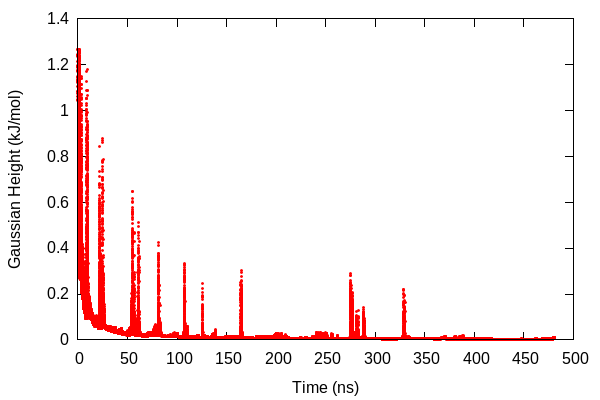

reset
set xlabel 'Time (ns)'
set ylabel 'Gaussian Height (kJ/mol)'

set output '/tmp/gnuplot-inline-1592828118.894019.814436428934.png'
p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/HILLS' u ($1/1000):4 w p ps 0.3 pt 7 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [16]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Gaussian Height (kJ/mol)'

p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/HILLS' u ($1/1000):4 w p ps 0.3 pt 7 lc 1 notitle

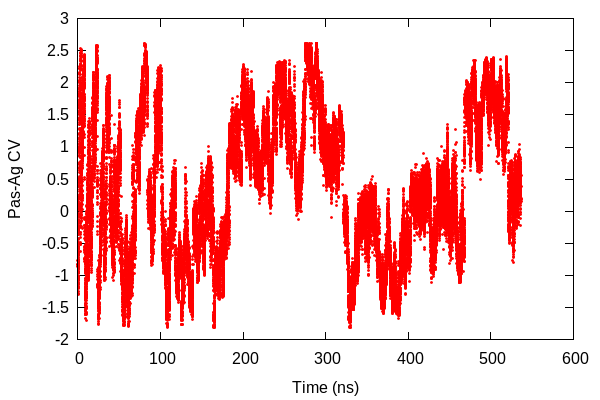

reset
set xlabel 'Time (ns)'
set ylabel 'Pas-Ag CV'

set output '/tmp/gnuplot-inline-1593425160.8181608.941871546588.png'
p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/COLVAR' every 10 u ($1/1000):2 w p ps 0.3 pt 7 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [34]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Pas-Ag CV'

p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/COLVAR' every 10 u ($1/1000):2 w p ps 0.3 pt 7 lc 1 notitle

** 2D reweighted free energy surface along Chi1 and Chi2 angles**

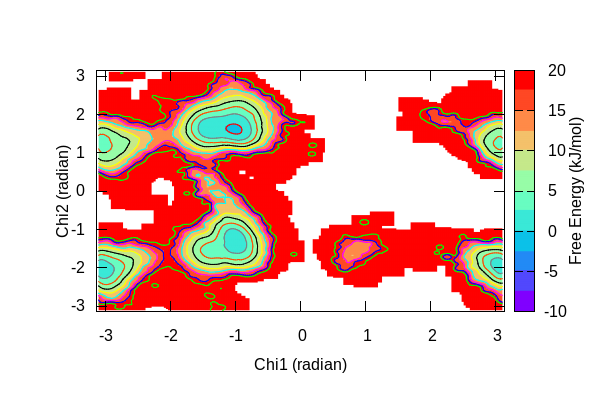

reset
set xlabel 'Chi1 (radian)'
set ylabel 'Chi2 (radian)'
set cbrange [-10:20]
set xrange [-3.14:3.14]
set yrange [-3.14:3.14]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1592908202.8732584.778131765598.png'
sp '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/RCT_bias/fes_chi.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [26]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1 (radian)'
set ylabel 'Chi2 (radian)'
set cbrange [-10:20]
set xrange [-3.14:3.14]
set yrange [-3.14:3.14]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/RCT_bias/fes_chi.dat' u 1:2:3 notitle

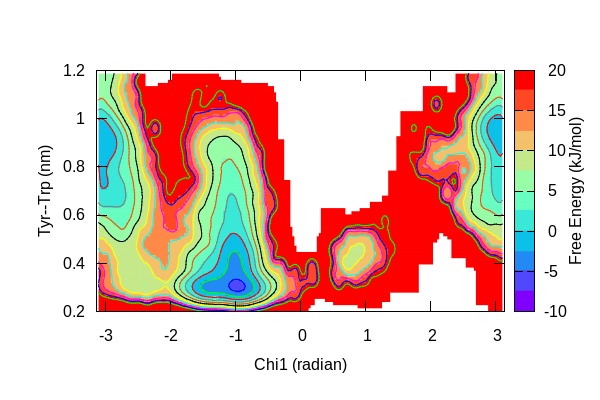

reset
set xlabel 'Chi1 (radian)'
set ylabel 'Tyr--Trp (nm)'
set cbrange [-10:20]
set xrange [-3.14:3.14]
set yrange [0.2:1.2]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1592828147.3043268.482734776343.png'
sp '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/RCT_bias/fes_trp.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [19]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1 (radian)'
set ylabel 'Tyr--Trp (nm)'
set cbrange [-10:20]
set xrange [-3.14:3.14]
set yrange [0.2:1.2]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/RCT_bias/fes_trp.dat' u 1:2:3 notitle

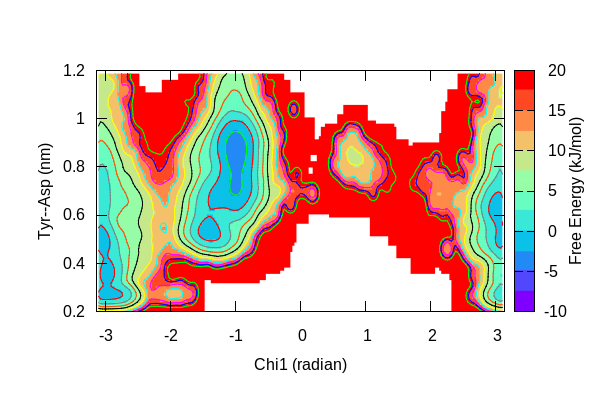

reset
set xlabel 'Chi1 (radian)'
set ylabel 'Tyr--Asp (nm)'
set cbrange [-10:20]
set xrange [-3.14:3.14]
set yrange [0.2:1.2]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12


set output '/tmp/gnuplot-inline-1592828151.8174367.116823856239.png'
sp '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/RCT_bias/fes_asp.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [20]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1 (radian)'
set ylabel 'Tyr--Asp (nm)'
set cbrange [-10:20]
set xrange [-3.14:3.14]
set yrange [0.2:1.2]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12


sp '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/RCT_bias/fes_asp.dat' u 1:2:3 notitle

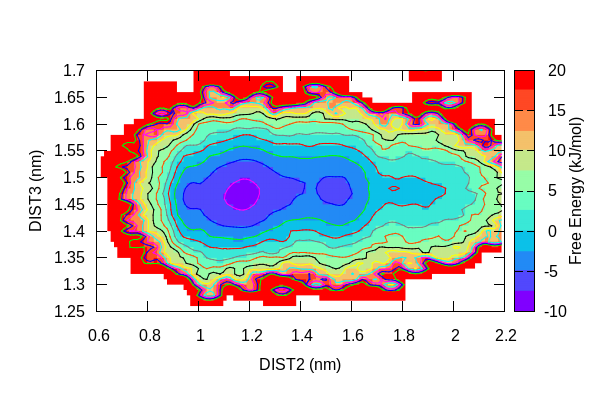

reset
set xlabel 'DIST2 (nm)'
set ylabel 'DIST3 (nm)'
set cbrange [-10:20]
set xrange [0.6:2.2]
set yrange [1.25:1.7]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1592828157.6028488.474944862375.png'
sp '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/RCT_bias/fes_metad.dat' u 1:2:3 notitle






gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [21]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'DIST2 (nm)'
set ylabel 'DIST3 (nm)'
set cbrange [-10:20]
set xrange [0.6:2.2]
set yrange [1.25:1.7]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/RCT_bias/fes_metad.dat' u 1:2:3 notitle

## BPTI

**Keeping the simulation on M1 state**

** DESRES M1: lack of sampling of FW if we take a cutoff of 0.25 nm along FW to define it as a exchange compatible state**

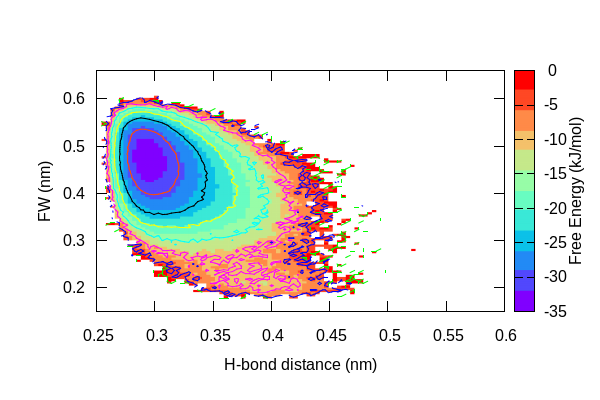

reset
set xlabel 'H-bond distance (nm)'
set ylabel 'FW (nm)'
set cblabel 'Free Energy (kJ/mol)'

set xrange [0.25:0.6]
set yrange [0.15:0.66]

set pm3d map
set contour base
 
set cntrparam levels incr -35,5,0
set palette rgbformulae 33,13,10
set palette maxcolors 12
 

set output '/tmp/gnuplot-inline-1591619541.1428359.936975005874.png'
sp '~/Aurora/DESRES/M_states/hist2d_hb_fw_M1.dat' u 1:2:(-4.184*(log($3))) notitle


gnuplot> gnuplot> unset output


In [22]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'H-bond distance (nm)'
set ylabel 'FW (nm)'
set cblabel 'Free Energy (kJ/mol)'

set xrange [0.25:0.6]
set yrange [0.15:0.66]

set pm3d map
set contour base
 
set cntrparam levels incr -35,5,0
set palette rgbformulae 33,13,10
set palette maxcolors 12
 

sp '~/Aurora/DESRES/M_states/hist2d_hb_fw_M1.dat' u 1:2:(-4.184*(log($3))) notitle

**Better sampling of the FW**

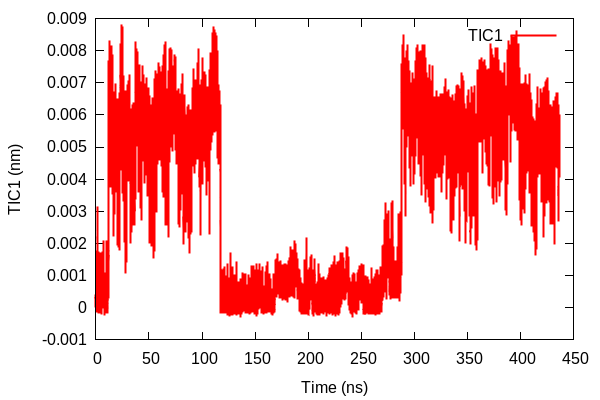

reset
set xlabel 'Time (ns)'
set ylabel 'TIC1 (nm)'

set output '/tmp/gnuplot-inline-1593081531.0184531.139372889127.png'
p '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/COLVAR' u ($1/1000):6 w l ls 1 lc 1 lt 1 lw 2 title 'TIC1'








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [27]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'TIC1 (nm)'

p '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/COLVAR' u ($1/1000):6 w l ls 1 lc 1 lt 1 lw 2 title 'TIC1'

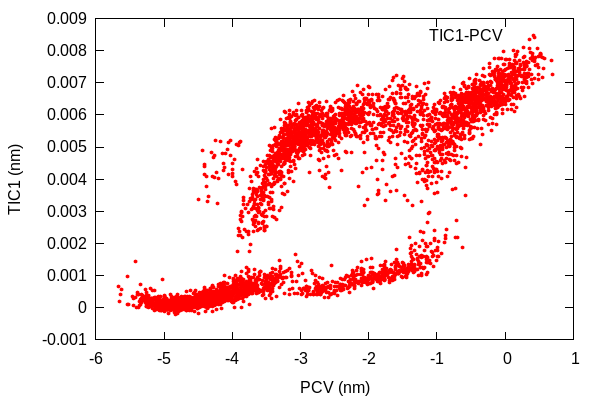

reset
set xlabel 'PCV (nm)'
set ylabel 'TIC1 (nm)'

set output '/tmp/gnuplot-inline-1593081646.6945148.604333095110.png'
p '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/COLVAR' every 100 u 3:6 w p ps 0.3 pt 7 lc 1 lw 2 title 'TIC1-PCV'








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [31]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'PCV (nm)'
set ylabel 'TIC1 (nm)'

p '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/COLVAR' every 100 u 3:6 w p ps 0.3 pt 7 lc 1 lw 2 title 'TIC1-PCV'

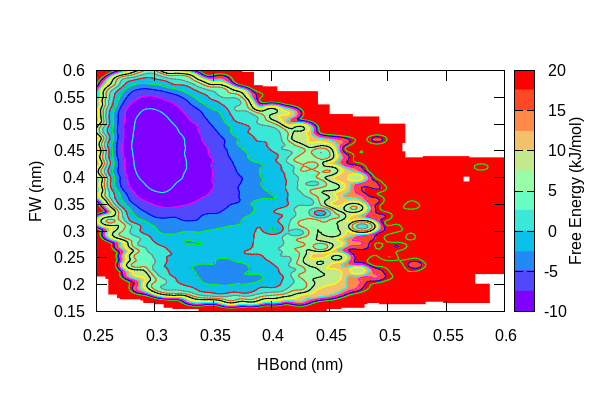

reset
set xlabel 'HBond (nm)'
set ylabel 'FW (nm)'
set cbrange [-10:20]
set xrange [0.25:0.6]
set yrange [0.15:0.6]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1592051935.4678965.453542295723.png'
sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/Reweighting/fes_fwile18.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [56]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'HBond (nm)'
set ylabel 'FW (nm)'
set cbrange [-10:20]
set xrange [0.25:0.6]
set yrange [0.15:0.6]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/Reweighting/fes_fwile18.dat' u 1:2:3 notitle

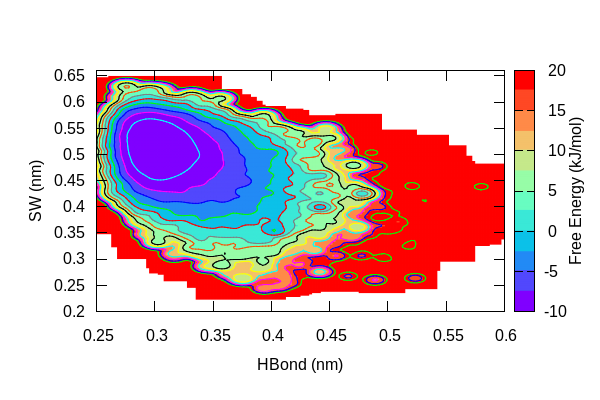

reset
set xlabel 'HBond (nm)'
set ylabel 'SW (nm)'
set cbrange [-10:20]
set xrange [0.25:0.6]
set yrange [0.2:0.66]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1592051015.6178515.120793016204.png'
sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/Reweighting/fes_swile18.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [49]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'HBond (nm)'
set ylabel 'SW (nm)'
set cbrange [-10:20]
set xrange [0.25:0.6]
set yrange [0.2:0.66]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/Reweighting/fes_swile18.dat' u 1:2:3 notitle

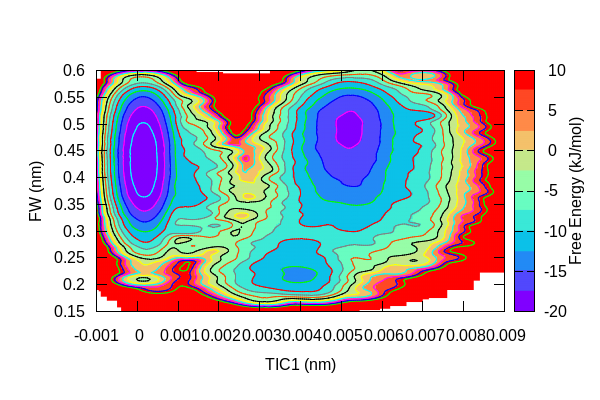

reset
set xlabel 'TIC1 (nm)'
set ylabel 'FW (nm)'
set cbrange [-20:10]
#set xrange [0.25:0.6]
set yrange [0.15:0.6]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -20,2.48,10
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1592051042.4643817.354492302570.png'
sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/Reweighting/fes_tic1fwile18.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [51]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'TIC1 (nm)'
set ylabel 'FW (nm)'
set cbrange [-20:10]
#set xrange [0.25:0.6]
set yrange [0.15:0.6]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -20,2.48,10
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/Rest_angle/Reweighting/fes_tic1fwile18.dat' u 1:2:3 notitle

**Convergence**

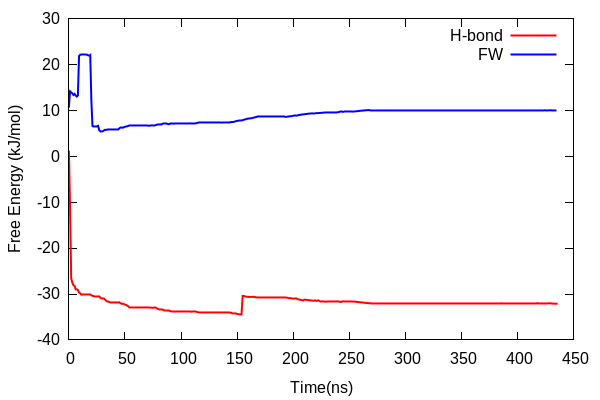

reset
set xlabel 'Time(ns)'
set ylabel 'Free Energy (kJ/mol)'
#set yrange [-40:-20]

set output '/tmp/gnuplot-inline-1592053629.9368415.115558343810.png'
p '~/Aurora/BPTI/Pas-ag-cv/Rest_angle/Convergence/H-bond/conv2.dat' u 1:2 w l ls 1 lc 1 lw 2 title 'H-bond', '~/Aurora/BPTI/Pas-ag-cv/Rest_angle/Convergence/FW/conv2.dat' u 1:2 w l ls 1 lc 3 lw 2 title 'FW'
unset output


In [57]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time(ns)'
set ylabel 'Free Energy (kJ/mol)'
#set yrange [-40:-20]

p '~/Aurora/BPTI/Pas-ag-cv/Rest_angle/Convergence/H-bond/conv2.dat' u 1:2 w l ls 1 lc 1 lw 2 title 'H-bond', '~/Aurora/BPTI/Pas-ag-cv/Rest_angle/Convergence/FW/conv2.dat' u 1:2 w l ls 1 lc 3 lw 2 title 'FW'

** Reweighting on M1 state**

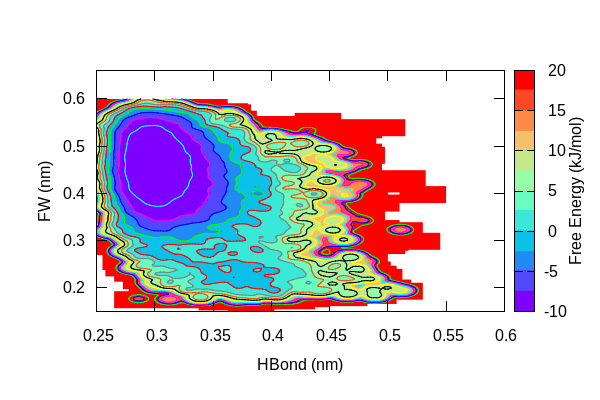

reset
set xlabel 'HBond (nm)'
set ylabel 'FW (nm)'
set cbrange [-10:20]
set xrange [0.25:0.6]
set yrange [0.15:0.66]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1591619259.0143602.984578861288.png'
sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/M1_state/fes_fwile18.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [15]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'HBond (nm)'
set ylabel 'FW (nm)'
set cbrange [-10:20]
set xrange [0.25:0.6]
set yrange [0.15:0.66]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/M1_state/fes_fwile18.dat' u 1:2:3 notitle

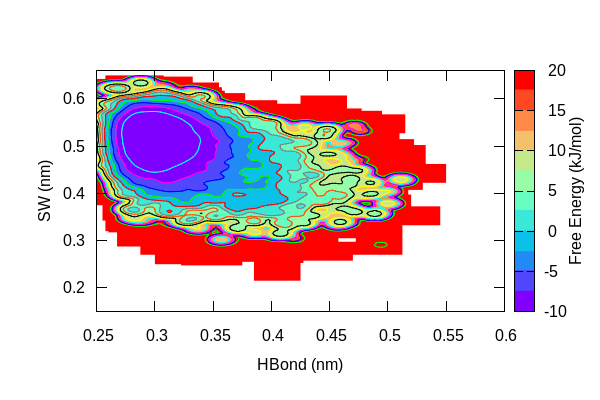

reset
set xlabel 'HBond (nm)'
set ylabel 'SW (nm)'
set cbrange [-10:20]
set xrange [0.25:0.6]
set yrange [0.15:0.66]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1591619293.32345.172878163942.png'
sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/M1_state/fes_swile18.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [16]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'HBond (nm)'
set ylabel 'SW (nm)'
set cbrange [-10:20]
set xrange [0.25:0.6]
set yrange [0.15:0.66]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -10,2.48,20
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/M1_state/fes_swile18.dat' u 1:2:3 notitle

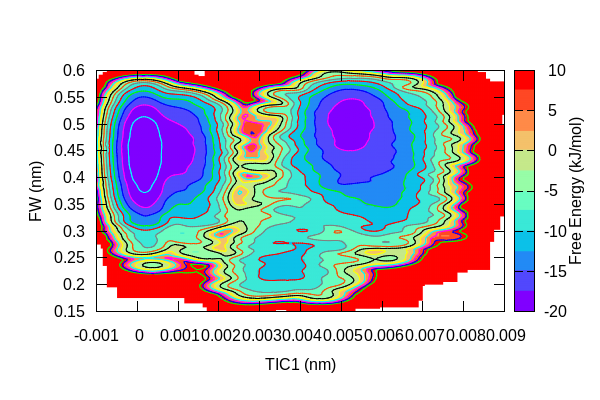

reset
set xlabel 'TIC1 (nm)'
set ylabel 'FW (nm)'
set cbrange [-20:10]
#set xrange [0.25:0.6]
set yrange [0.15:0.6]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -20,2.48,10
set palette rgbformulae 33,13,10
set palette maxcolors 12

set output '/tmp/gnuplot-inline-1591619350.6648054.479858452047.png'
sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/M1_state/fes_tic1fwile18.dat' u 1:2:3 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [20]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'TIC1 (nm)'
set ylabel 'FW (nm)'
set cbrange [-20:10]
#set xrange [0.25:0.6]
set yrange [0.15:0.6]
set cblabel 'Free Energy (kJ/mol)'

set pm3d map
set contour base
 
set cntrparam levels incr -20,2.48,10
set palette rgbformulae 33,13,10
set palette maxcolors 12

sp '/home/sbhakat/Aurora/BPTI/Pas-ag-cv/M1_state/fes_tic1fwile18.dat' u 1:2:3 notitle